In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from patchify import patchify
import csv
import time
import os
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [7]:
count=1
for subdir, dirs, files in os.walk('aug'):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            name=file
            image = cv2.resize(img, (224, 224))
            patch_shape = (16, 16, 3)
            patches = patchify(image, patch_shape, 16)
            a = (224**2) // (16**2)
            patches = np.reshape(patches, (196, 16, 16, 3))
            b = (a, 16*16*3)
            
            for i in range(196):
                cv2.imwrite(f"files/{count}_{i}.png", patches[i])
            count=count+1


In [8]:
#Set root directory for os.walk
rootdir="files"
#Conter variable to count number of image processed
count=0


#write headers in csv files
with open('details','w',newline='') as f1:
    fieldnames=["image_name", "r", "g", "b"]
    writer=csv.DictWriter(f1, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
start=time.time()
#Iterate through the images directory
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):

            # Input image path
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img1 =img[:,:,0]
            img2 =img[:,:,1]
            img3 =img[:,:,2]
            fl=img1.flatten()
            fl1=img2.flatten()
            fl2=img3.flatten()
            fl=sum(fl)
            fl1=sum(fl1)
            fl2=sum(fl2)
            line= [file,fl,fl1,fl2]
            with open("details.csv","a",newline="") as s:
                    writer=csv.writer(s, delimiter=",")
                    writer.writerow(line)
            count+=1
            print(count)
end=time.time()

print("Total image processed={}    Time={}".format(count,end-start))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
Total image processed=196    Time=0.7444219589233398


In [2]:
img=pd.read_csv('C:\\Users\\Admin\\Desktop\\details.csv',header=None)
x=img.drop([0],1)
print(x)
print(np.shape(x))

         1      2      3
0    12560  22645   9859
1     9989  20469   8442
2    12399  22466  10310
3    18015  32947  10328
4     5617  22566   3676
..     ...    ...    ...
191   6692  23397   4094
192   8113  24698   4950
193   3724  21011   2379
194  26845  40299  15087
195  13384  29175   7653

[196 rows x 3 columns]
(196, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_19756\2139952562.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=img.drop([0],1)


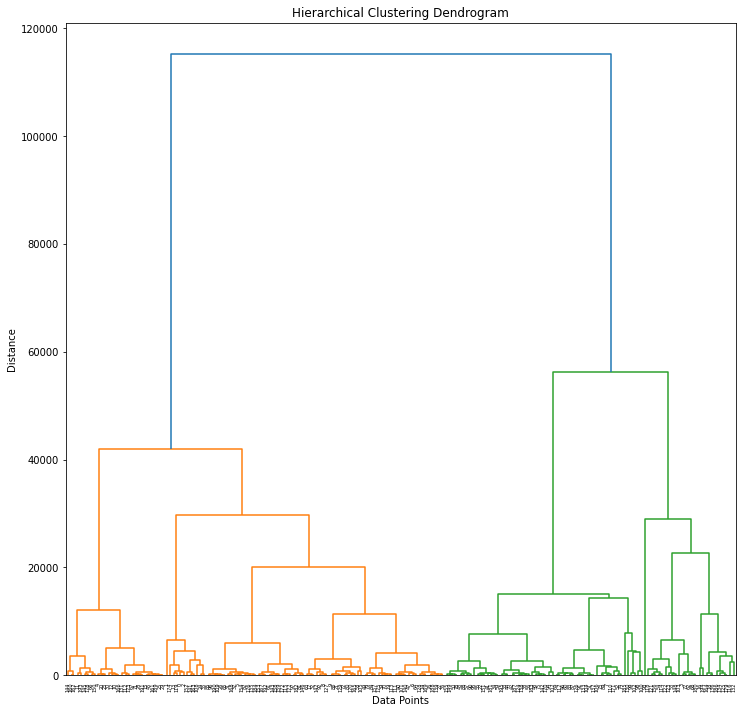

In [22]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Generate synthetic data (you can replace this with your own dataset)
 
# Perform hierarchical clustering using complete linkage
linkage_matrix = linkage(x, method='ward')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 12))
dendrogram(linkage_matrix)#, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


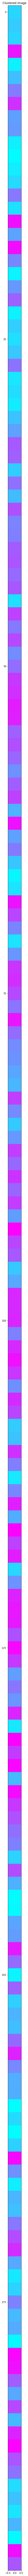

In [43]:
cut_height = 0.01

# Assign clusters to pixels based on the cut height
clusters = fcluster(linkage_matrix, cut_height, criterion='distance')

# Reshape the cluster assignments to the original image shape
clustered_image = clusters.reshape(196,1)
plt.figure(figsize=(20, 200))
plt.subplot(1, 10, 10)
#plt.legend()
plt.imshow(clustered_image, cmap='cool')
plt.title('Clustered Image')

plt.show()

In [26]:
cut_height = 0.01

# Assign data points to clusters based on the cut height
clusters = fcluster(linkage_matrix, cut_height, criterion='distance')

# Collect data points in each cluster
cluster_dict = {}
for data_point, cluster_id in enumerate(clusters):
    if cluster_id not in cluster_dict:
        cluster_dict[cluster_id] = []
    cluster_dict[cluster_id].append(data_point)

# Print the clusters at different levels
for cluster_id, data_points in cluster_dict.items():
    print(f'Cluster {cluster_id}: {data_points}')


Cluster 32: [0]
Cluster 41: [1]
Cluster 33: [2]
Cluster 179: [3]
Cluster 12: [4]
Cluster 50: [5]
Cluster 101: [6]
Cluster 158: [7]
Cluster 74: [8]
Cluster 78: [9]
Cluster 13: [10]
Cluster 4: [11]
Cluster 15: [12]
Cluster 30: [13]
Cluster 104: [14]
Cluster 24: [15]
Cluster 185: [16]
Cluster 71: [17]
Cluster 187: [18]
Cluster 92: [19]
Cluster 10: [20]
Cluster 80: [21]
Cluster 120: [22]
Cluster 11: [23]
Cluster 38: [24]
Cluster 26: [25]
Cluster 44: [26]
Cluster 109: [27]
Cluster 20: [28]
Cluster 27: [29]
Cluster 16: [30]
Cluster 48: [31]
Cluster 72: [32]
Cluster 128: [33]
Cluster 123: [34]
Cluster 39: [35]
Cluster 110: [36]
Cluster 52: [37]
Cluster 135: [38]
Cluster 95: [39]
Cluster 99: [40]
Cluster 126: [41]
Cluster 131: [42]
Cluster 116: [43]
Cluster 129: [44]
Cluster 25: [45]
Cluster 146: [46]
Cluster 103: [47]
Cluster 140: [48]
Cluster 88: [49]
Cluster 112: [50]
Cluster 153: [51]
Cluster 160: [52]
Cluster 175: [53]
Cluster 172: [54]
Cluster 122: [55]
Cluster 136: [56]
Cluster 118: [57

In [27]:
print(len(cluster_dict))


196


In [7]:
count=1
for subdir, dirs, files in os.walk('aug1'):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            name=file
            image = cv2.resize(img, (224, 224))
            patch_shape = (16, 16, 3)
            patches = patchify(image, patch_shape, 16)
            a = (224**2) // (16**2)
            patches = np.reshape(patches, (196, 16, 16, 3))
            b = (a, 16*16*3)
            
            for i in range(196):
                cv2.imwrite(f"files1/{count}_{i}.png", patches[i])
            count=count+1


In [8]:
#Set root directory for os.walk
rootdir="files1"
#Conter variable to count number of image processed
count=0


#write headers in csv files
with open('details1','w',newline='') as f1:
    fieldnames=["image_name", "r", "g", "b"]
    writer=csv.DictWriter(f1, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
start=time.time()
#Iterate through the images directory
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):

            # Input image path
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img1 =img[:,:,0]
            img2 =img[:,:,1]
            img3 =img[:,:,2]
            fl=img1.flatten()
            fl1=img2.flatten()
            fl2=img3.flatten()
            fl=sum(fl)
            fl1=sum(fl1)
            fl2=sum(fl2)
            line= [file,fl,fl1,fl2]
            with open("details1.csv","a",newline="") as s:
                    writer=csv.writer(s, delimiter=",")
                    writer.writerow(line)
            count+=1
            print(count)
end=time.time()

print("Total image processed={}    Time={}".format(count,end-start))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
Total image processed=196    Time=0.4568910598754883


In [9]:
img1=pd.read_csv('C:\\Users\\Admin\\Desktop\\details1.csv',header=None)
x1=img1.drop([0],1)
print(x1)
print(np.shape(x1))

         1      2      3
0     7049  17854   6759
1     7764  18476   7212
2     8162  18741   7402
3    18337  31995  11498
4    14013  29138   8584
..     ...    ...    ...
191  18316  33000  10271
192  16800  31799   9635
193   7975  24570   4725
194   3935  21227   2414
195   9702  25965   5659

[196 rows x 3 columns]
(196, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10808\508790968.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x1=img1.drop([0],1)


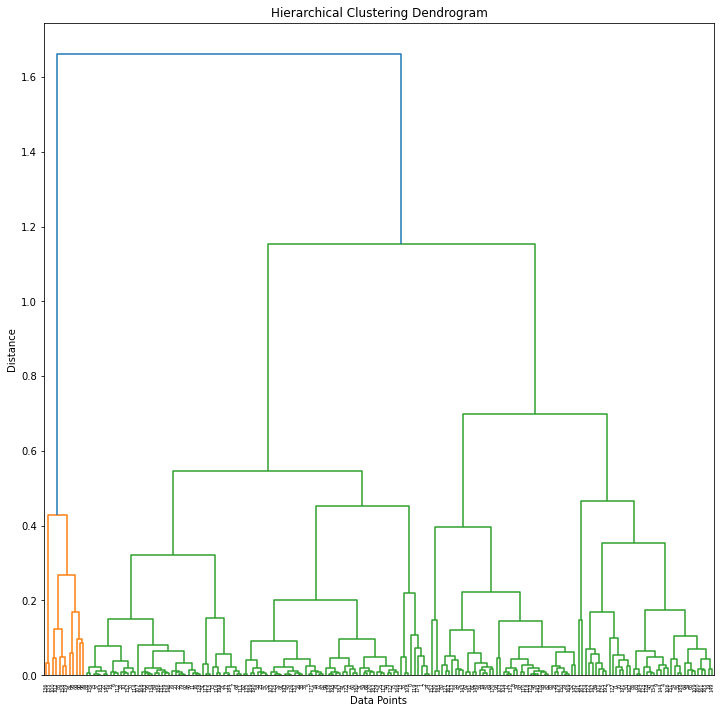

In [10]:
scaler1 = MinMaxScaler()
X_scaled1 = scaler1.fit_transform(x1)


# Generate synthetic data (you can replace this with your own dataset)
 
# Perform hierarchical clustering using complete linkage
linkage_matrix1 = linkage(X_scaled1, method='complete')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 12))
dendrogram(linkage_matrix1)#, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [11]:
cut_height = 0.01

# Assign data points to clusters based on the cut height
clusters1 = fcluster(linkage_matrix1, cut_height, criterion='distance')

# Collect data points in each cluster
cluster_dict1 = {}
for data_point1, cluster_id1 in enumerate(clusters1):
    if cluster_id1 not in cluster_dict1:
        cluster_dict1[cluster_id1] = []
    cluster_dict1[cluster_id1].append(data_point1)

# Print the clusters at different levels
for cluster_id1, data_points1 in cluster_dict1.items():
    print(f'Cluster {cluster_id1}: {data_points1}')


Cluster 60: [0]
Cluster 57: [1]
Cluster 56: [2, 24]
Cluster 105: [3]
Cluster 112: [4]
Cluster 40: [5, 171]
Cluster 16: [6, 18, 112]
Cluster 33: [7]
Cluster 80: [8]
Cluster 110: [9]
Cluster 17: [10, 33, 157]
Cluster 24: [11, 16, 128]
Cluster 79: [12, 104, 137]
Cluster 55: [13]
Cluster 73: [14, 43]
Cluster 30: [15]
Cluster 31: [17, 21, 184]
Cluster 124: [19]
Cluster 22: [20, 22, 79, 92]
Cluster 36: [23, 47, 52, 58]
Cluster 51: [25, 117, 129]
Cluster 39: [26, 38, 132]
Cluster 15: [27, 140]
Cluster 86: [28, 179]
Cluster 87: [29, 150, 169]
Cluster 18: [30, 114]
Cluster 50: [31]
Cluster 37: [32, 91, 105, 125]
Cluster 119: [34]
Cluster 54: [35, 108]
Cluster 42: [36]
Cluster 14: [37, 73, 183]
Cluster 81: [39]
Cluster 108: [40, 154, 178]
Cluster 45: [41, 172]
Cluster 67: [42]
Cluster 52: [44, 127]
Cluster 38: [45, 126, 193]
Cluster 25: [46]
Cluster 83: [48, 145, 173]
Cluster 84: [49, 82, 176]
Cluster 102: [50]
Cluster 28: [51]
Cluster 69: [53]
Cluster 115: [54]
Cluster 114: [55, 188]
Cluster 74

In [12]:
count=1
for subdir, dirs, files in os.walk('aug2'):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            name=file
            image = cv2.resize(img, (224, 224))
            patch_shape = (16, 16, 3)
            patches = patchify(image, patch_shape, 16)
            a = (224**2) // (16**2)
            patches = np.reshape(patches, (196, 16, 16, 3))
            b = (a, 16*16*3)
            
            for i in range(196):
                cv2.imwrite(f"files2/{count}_{i}.png", patches[i])
            count=count+1


In [13]:
#Set root directory for os.walk
rootdir="files2"
#Conter variable to count number of image processed
count=0


#write headers in csv files
with open('details2','w',newline='') as f1:
    fieldnames=["image_name", "r", "g", "b"]
    writer=csv.DictWriter(f1, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
start=time.time()
#Iterate through the images directory
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):

            # Input image path
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img1 =img[:,:,0]
            img2 =img[:,:,1]
            img3 =img[:,:,2]
            fl=img1.flatten()
            fl1=img2.flatten()
            fl2=img3.flatten()
            fl=sum(fl)
            fl1=sum(fl1)
            fl2=sum(fl2)
            line= [file,fl,fl1,fl2]
            with open("details2.csv","a",newline="") as s:
                    writer=csv.writer(s, delimiter=",")
                    writer.writerow(line)
            count+=1
            print(count)
end=time.time()

print("Total image processed={}    Time={}".format(count,end-start))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
Total image processed=196    Time=1.9834363460540771


In [14]:
img2=pd.read_csv('C:\\Users\\Admin\\Desktop\\details2.csv',header=None)
x2=img2.drop([0],1)
print(x2)
print(np.shape(x2))

         1      2      3
0    31817  35606  25077
1    23147  29625  17392
2    13727  23515  10796
3    57971  59233  46265
4    52175  55005  39910
..     ...    ...    ...
191  24312  37037  14871
192  18563  32268  11912
193  14704  29825   8740
194  25341  37974  15367
195  42930  49894  30420

[196 rows x 3 columns]
(196, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10808\1253346418.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x2=img2.drop([0],1)


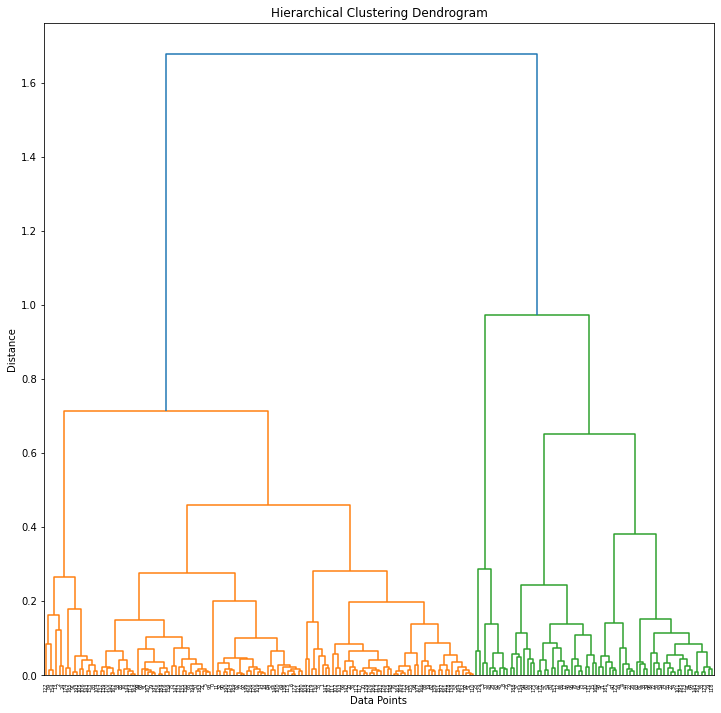

In [15]:
scaler2 = MinMaxScaler()
X_scaled2 = scaler2.fit_transform(x2)


# Generate synthetic data (you can replace this with your own dataset)
 
# Perform hierarchical clustering using complete linkage
linkage_matrix2 = linkage(X_scaled2, method='complete')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 12))
dendrogram(linkage_matrix2)#, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [16]:
cut_height = 0.01

# Assign data points to clusters based on the cut height
clusters2 = fcluster(linkage_matrix2, cut_height, criterion='distance')

# Collect data points in each cluster
cluster_dict2 = {}
for data_point2, cluster_id2 in enumerate(clusters2):
    if cluster_id2 not in cluster_dict2:
        cluster_dict2[cluster_id2] = []
    cluster_dict2[cluster_id2].append(data_point2)

# Print the clusters at different levels
for cluster_id2, data_points2 in cluster_dict2.items():
    print(f'Cluster {cluster_id2}: {data_points2}')


Cluster 59: [0]
Cluster 66: [1]
Cluster 4: [2]
Cluster 105: [3]
Cluster 148: [4]
Cluster 39: [5, 93]
Cluster 55: [6, 115, 172]
Cluster 143: [7]
Cluster 110: [8]
Cluster 113: [9]
Cluster 135: [10]
Cluster 41: [11]
Cluster 130: [12]
Cluster 6: [13]
Cluster 49: [14, 18, 109]
Cluster 137: [15]
Cluster 24: [16]
Cluster 127: [17]
Cluster 91: [19]
Cluster 75: [20]
Cluster 40: [21]
Cluster 145: [22]
Cluster 111: [23]
Cluster 5: [24]
Cluster 103: [25]
Cluster 146: [26]
Cluster 158: [27, 34]
Cluster 107: [28]
Cluster 168: [29]
Cluster 106: [30]
Cluster 26: [31]
Cluster 42: [32]
Cluster 167: [33, 123]
Cluster 67: [35]
Cluster 73: [36]
Cluster 115: [37]
Cluster 150: [38]
Cluster 151: [39]
Cluster 141: [40]
Cluster 163: [41]
Cluster 121: [42]
Cluster 109: [43]
Cluster 147: [44]
Cluster 112: [45]
Cluster 128: [46]
Cluster 123: [47]
Cluster 139: [48]
Cluster 149: [49]
Cluster 37: [50]
Cluster 100: [51, 92, 110]
Cluster 51: [52]
Cluster 117: [53]
Cluster 124: [54]
Cluster 159: [55]
Cluster 154: [56]
C

In [17]:
count=1
for subdir, dirs, files in os.walk('aug3'):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            name=file
            image = cv2.resize(img, (224, 224))
            patch_shape = (16, 16, 3)
            patches = patchify(image, patch_shape, 16)
            a = (224**2) // (16**2)
            patches = np.reshape(patches, (196, 16, 16, 3))
            b = (a, 16*16*3)
            
            for i in range(196):
                cv2.imwrite(f"files3/{count}_{i}.png", patches[i])
            count=count+1


In [18]:
#Set root directory for os.walk
rootdir="files3"
#Conter variable to count number of image processed
count=0


#write headers in csv files
with open('details3','w',newline='') as f1:
    fieldnames=["image_name", "r", "g", "b"]
    writer=csv.DictWriter(f1, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
start=time.time()
#Iterate through the images directory
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):

            # Input image path
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img1 =img[:,:,0]
            img2 =img[:,:,1]
            img3 =img[:,:,2]
            fl=img1.flatten()
            fl1=img2.flatten()
            fl2=img3.flatten()
            fl=sum(fl)
            fl1=sum(fl1)
            fl2=sum(fl2)
            line= [file,fl,fl1,fl2]
            with open("details3.csv","a",newline="") as s:
                    writer=csv.writer(s, delimiter=",")
                    writer.writerow(line)
            count+=1
            print(count)
end=time.time()

print("Total image processed={}    Time={}".format(count,end-start))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
Total image processed=196    Time=0.2812187671661377


In [19]:
img3=pd.read_csv('C:\\Users\\Admin\\Desktop\\details3.csv',header=None)
x3=img3.drop([0],1)
print(x3)
print(np.shape(x3))

         1      2      3
0    14469  23916  11157
1    18123  26283  15408
2    13380  22907  10843
3    24353  36058  18347
4    14924  30189   8990
..     ...    ...    ...
191  13390  29024   7690
192  17483  32093  10610
193  13823  29153   8067
194  10825  26880   6865
195   9525  25534   6256

[196 rows x 3 columns]
(196, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10808\2409392574.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x3=img3.drop([0],1)


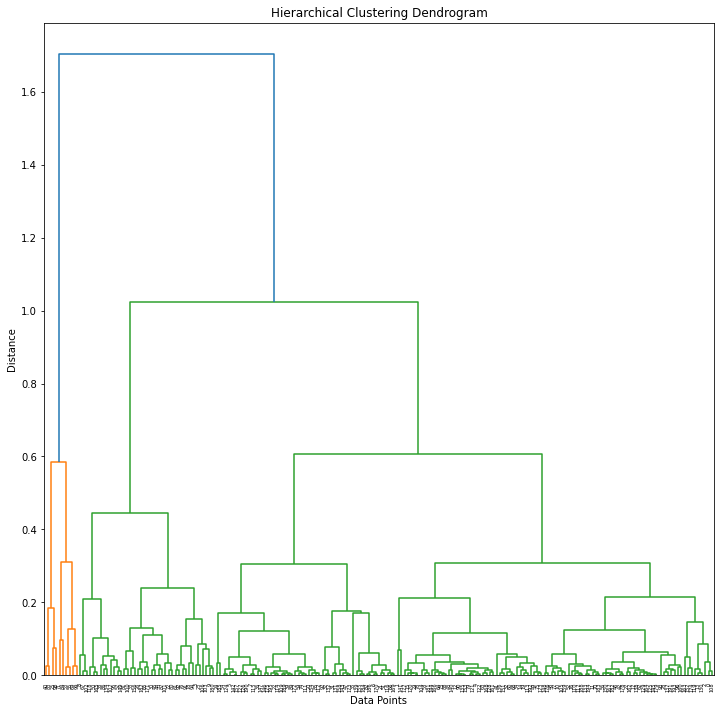

In [20]:
# Generate synthetic data (you can replace this with your own dataset)
scaler3 = MinMaxScaler()
X_scaled3 = scaler3.fit_transform(x3) 
# Perform hierarchical clustering using complete linkage
linkage_matrix3 = linkage(X_scaled3, method='complete')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 12))
dendrogram(linkage_matrix3)#, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [21]:
cut_height = 0.01

# Assign data points to clusters based on the cut height
clusters3 = fcluster(linkage_matrix3, cut_height, criterion='distance')

# Collect data points in each cluster
cluster_dict3 = {}
for data_point3, cluster_id3 in enumerate(clusters3):
    if cluster_id3 not in cluster_dict3:
        cluster_dict3[cluster_id3] = []
    cluster_dict3[cluster_id3].append(data_point3)

# Print the clusters at different levels
for cluster_id3, data_points3 in cluster_dict3.items():
    print(f'Cluster {cluster_id3}: {data_points3}')


Cluster 124: [0]
Cluster 77: [1]
Cluster 126: [2]
Cluster 45: [3]
Cluster 88: [4, 79, 121, 122]
Cluster 54: [5, 142, 157]
Cluster 73: [6, 82, 170, 186]
Cluster 56: [7, 115]
Cluster 13: [8]
Cluster 47: [9]
Cluster 102: [10]
Cluster 106: [11, 70, 183]
Cluster 87: [12, 90, 135, 153]
Cluster 122: [13, 130]
Cluster 94: [14]
Cluster 79: [15, 29, 78, 120]
Cluster 104: [16]
Cluster 111: [17, 138]
Cluster 43: [18]
Cluster 93: [19, 113]
Cluster 65: [20]
Cluster 74: [21, 51]
Cluster 60: [22, 114, 195]
Cluster 46: [23]
Cluster 51: [24]
Cluster 3: [25]
Cluster 28: [26]
Cluster 110: [27, 162]
Cluster 113: [28, 137]
Cluster 32: [30]
Cluster 68: [31, 131]
Cluster 92: [32, 60, 68]
Cluster 26: [33]
Cluster 95: [34]
Cluster 76: [35]
Cluster 57: [36]
Cluster 66: [37, 132]
Cluster 19: [38]
Cluster 61: [39, 89, 109, 189]
Cluster 1: [40]
Cluster 98: [41]
Cluster 109: [42, 46, 178]
Cluster 85: [43]
Cluster 34: [44]
Cluster 33: [45]
Cluster 69: [47, 143, 173]
Cluster 100: [48, 77]
Cluster 96: [49, 75, 123]
Clu

In [22]:
count=1
for subdir, dirs, files in os.walk('aug4'):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            name=file
            image = cv2.resize(img, (224, 224))
            patch_shape = (16, 16, 3)
            patches = patchify(image, patch_shape, 16)
            a = (224**2) // (16**2)
            patches = np.reshape(patches, (196, 16, 16, 3))
            b = (a, 16*16*3)
            
            for i in range(196):
                cv2.imwrite(f"files4/{count}_{i}.png", patches[i])
            count=count+1


In [23]:
#Set root directory for os.walk
rootdir="files4"
#Conter variable to count number of image processed
count=0


#write headers in csv files
with open('details4','w',newline='') as f1:
    fieldnames=["image_name", "r", "g", "b"]
    writer=csv.DictWriter(f1, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
start=time.time()
#Iterate through the images directory
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):

            # Input image path
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img1 =img[:,:,0]
            img2 =img[:,:,1]
            img3 =img[:,:,2]
            fl=img1.flatten()
            fl1=img2.flatten()
            fl2=img3.flatten()
            fl=sum(fl)
            fl1=sum(fl1)
            fl2=sum(fl2)
            line= [file,fl,fl1,fl2]
            with open("details4.csv","a",newline="") as s:
                    writer=csv.writer(s, delimiter=",")
                    writer.writerow(line)
            count+=1
            print(count)
end=time.time()

print("Total image processed={}    Time={}".format(count,end-start))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
Total image processed=196    Time=0.2650275230407715


In [24]:
img4=pd.read_csv('C:\\Users\\Admin\\Desktop\\details4.csv',header=None)
x4=img4.drop([0],1)
print(x4)
print(np.shape(x4))

         1      2      3
0    11349  21531   9120
1    13255  23246  10430
2     8631  19047   7834
3    13289  27846  10466
4    13002  28754   7645
..     ...    ...    ...
191  14321  29927   8166
192  17442  32662  10095
193  14651  29993   8495
194   9743  25753   5866
195   8917  25366   5357

[196 rows x 3 columns]
(196, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10808\471932748.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x4=img4.drop([0],1)


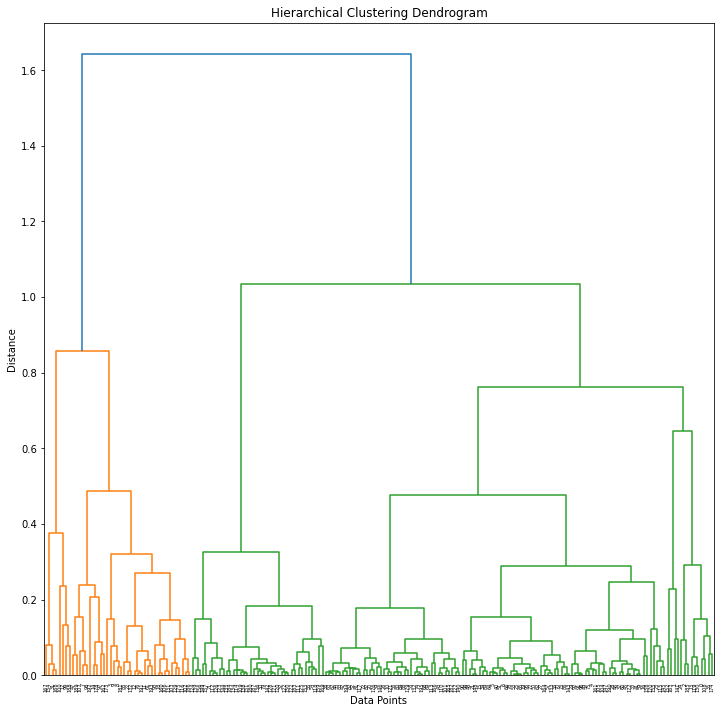

In [25]:
# Generate synthetic data (you can replace this with your own dataset)
scaler4 = MinMaxScaler()
X_scaled4 = scaler4.fit_transform(x4) 
# Perform hierarchical clustering using complete linkage
linkage_matrix4 = linkage(X_scaled4, method='complete')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 12))
dendrogram(linkage_matrix4)#, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [26]:
cut_height = 0.01

# Assign data points to clusters based on the cut height
clusters4 = fcluster(linkage_matrix4, cut_height, criterion='distance')

# Collect data points in each cluster
cluster_dict4 = {}
for data_point4, cluster_id4 in enumerate(clusters4):
    if cluster_id4 not in cluster_dict4:
        cluster_dict4[cluster_id4] = []
    cluster_dict4[cluster_id4].append(data_point4)

# Print the clusters at different levels
for cluster_id4, data_points4 in cluster_dict4.items():
    print(f'Cluster {cluster_id4}: {data_points4}')


Cluster 154: [0]
Cluster 146: [1]
Cluster 148: [2]
Cluster 22: [3]
Cluster 127: [4]
Cluster 108: [5, 40, 64]
Cluster 109: [6, 66]
Cluster 11: [7]
Cluster 19: [8]
Cluster 21: [9]
Cluster 85: [10, 121]
Cluster 31: [11]
Cluster 28: [12]
Cluster 153: [13]
Cluster 14: [14]
Cluster 107: [15]
Cluster 137: [16]
Cluster 7: [17]
Cluster 32: [18, 160]
Cluster 113: [19, 95]
Cluster 81: [20]
Cluster 103: [21, 148]
Cluster 24: [22]
Cluster 141: [23]
Cluster 150: [24]
Cluster 111: [25, 53, 65]
Cluster 86: [26]
Cluster 118: [27]
Cluster 131: [28, 46]
Cluster 124: [29]
Cluster 55: [30, 79]
Cluster 1: [31]
Cluster 59: [32, 122, 150]
Cluster 136: [33]
Cluster 105: [34]
Cluster 156: [35]
Cluster 119: [36]
Cluster 133: [37, 60]
Cluster 72: [38, 63, 67]
Cluster 83: [39]
Cluster 135: [41, 59]
Cluster 74: [42]
Cluster 96: [43, 110]
Cluster 73: [44, 83]
Cluster 134: [45, 177]
Cluster 9: [47]
Cluster 104: [48]
Cluster 125: [49]
Cluster 114: [50, 62]
Cluster 110: [51]
Cluster 77: [52]
Cluster 66: [54]
Cluster 68

In [27]:
count=1
for subdir, dirs, files in os.walk('aug5'):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            name=file
            image = cv2.resize(img, (224, 224))
            patch_shape = (16, 16, 3)
            patches = patchify(image, patch_shape, 16)
            a = (224**2) // (16**2)
            patches = np.reshape(patches, (196, 16, 16, 3))
            b = (a, 16*16*3)
            
            for i in range(196):
                cv2.imwrite(f"files5/{count}_{i}.png", patches[i])
            count=count+1


In [28]:
#Set root directory for os.walk
rootdir="files5"
#Conter variable to count number of image processed
count=0


#write headers in csv files
with open('details5','w',newline='') as f1:
    fieldnames=["image_name", "r", "g", "b"]
    writer=csv.DictWriter(f1, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
start=time.time()
#Iterate through the images directory
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):

            # Input image path
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img1 =img[:,:,0]
            img2 =img[:,:,1]
            img3 =img[:,:,2]
            fl=img1.flatten()
            fl1=img2.flatten()
            fl2=img3.flatten()
            fl=sum(fl)
            fl1=sum(fl1)
            fl2=sum(fl2)
            line= [file,fl,fl1,fl2]
            with open("details5.csv","a",newline="") as s:
                    writer=csv.writer(s, delimiter=",")
                    writer.writerow(line)
            count+=1
            print(count)
end=time.time()

print("Total image processed={}    Time={}".format(count,end-start))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
Total image processed=196    Time=0.31384873390197754


In [29]:
img5=pd.read_csv('C:\\Users\\Admin\\Desktop\\details5.csv',header=None)
x5=img5.drop([0],1)
print(x5)
print(np.shape(x5))

         1      2      3
0    11281  21300   9194
1    12313  22227   9595
2     9346  19731   8169
3    11624  27619   6535
4    13106  28840   7321
..     ...    ...    ...
191  60480  60941  53433
192  38112  45255  31966
193  26659  38043  18205
194  10131  26401   5691
195   9936  26171   5854

[196 rows x 3 columns]
(196, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10808\1104620605.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x5=img5.drop([0],1)


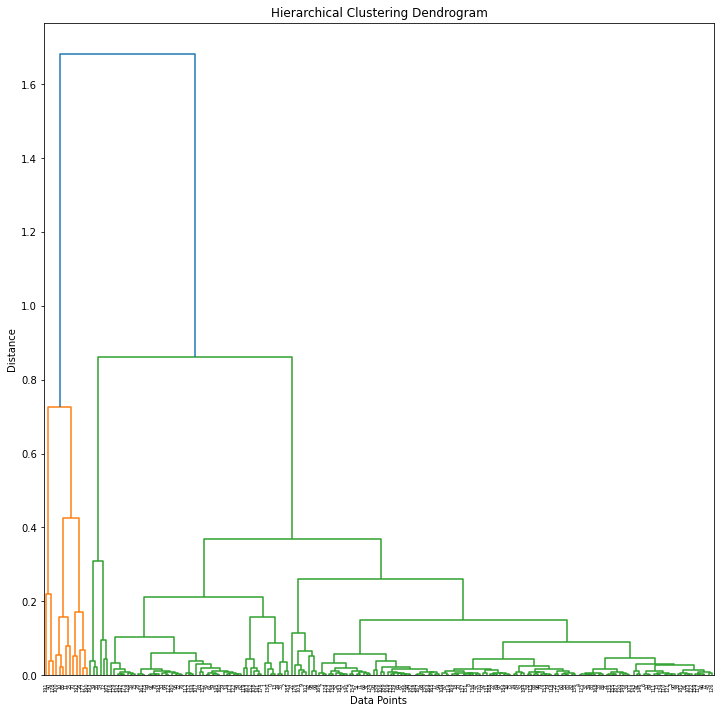

In [30]:
# Generate synthetic data (you can replace this with your own dataset)
scaler5 = MinMaxScaler()
X_scaled5 = scaler5.fit_transform(x5) 
# Perform hierarchical clustering using complete linkage
linkage_matrix5 = linkage(X_scaled5, method='complete')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 12))
dendrogram(linkage_matrix5)#, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [31]:
cut_height = 0.01

# Assign data points to clusters based on the cut height
clusters5 = fcluster(linkage_matrix5, cut_height, criterion='distance')

# Collect data points in each cluster
cluster_dict5 = {}
for data_point5, cluster_id5 in enumerate(clusters5):
    if cluster_id5 not in cluster_dict5:
        cluster_dict5[cluster_id5] = []
    cluster_dict5[cluster_id5].append(data_point5)

# Print the clusters at different levels
for cluster_id5, data_points5 in cluster_dict5.items():
    print(f'Cluster {cluster_id5}: {data_points5}')


Cluster 36: [0, 13]
Cluster 38: [1]
Cluster 40: [2]
Cluster 72: [3, 15, 90, 110, 111, 121, 134]
Cluster 67: [4, 33, 34, 37, 83, 86, 125, 168]
Cluster 52: [5, 154]
Cluster 71: [6, 50, 89]
Cluster 49: [7, 166, 179]
Cluster 60: [8, 18, 20, 47, 136, 137, 151, 169, 170]
Cluster 42: [9, 102]
Cluster 4: [10]
Cluster 7: [11]
Cluster 17: [12]
Cluster 29: [14, 29, 48, 62, 113, 127]
Cluster 62: [16, 22, 69, 75, 97, 184, 188]
Cluster 58: [17, 68, 94, 148, 150, 164, 165, 167]
Cluster 64: [19, 58, 79, 88, 96, 115, 118, 153]
Cluster 68: [21, 36, 101, 120, 135, 149, 155, 187]
Cluster 65: [23, 171]
Cluster 39: [24, 35]
Cluster 8: [25]
Cluster 13: [26]
Cluster 48: [27]
Cluster 23: [28, 161, 175]
Cluster 25: [30, 64, 72, 76, 95, 172, 180]
Cluster 53: [31, 51, 66, 71, 124]
Cluster 63: [32, 74, 84, 194]
Cluster 73: [38, 81, 105, 122, 181]
Cluster 14: [39]
Cluster 1: [40]
Cluster 69: [41, 146]
Cluster 47: [42]
Cluster 74: [43, 46, 77, 117, 126, 159]
Cluster 57: [44, 65, 67, 109, 133, 139, 182, 186]
Cluster 

In [32]:
count=1
for subdir, dirs, files in os.walk('aug6'):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            name=file
            image = cv2.resize(img, (224, 224))
            patch_shape = (16, 16, 3)
            patches = patchify(image, patch_shape, 16)
            a = (224**2) // (16**2)
            patches = np.reshape(patches, (196, 16, 16, 3))
            b = (a, 16*16*3)
            
            for i in range(196):
                cv2.imwrite(f"files6/{count}_{i}.png", patches[i])
            count=count+1


In [33]:
#Set root directory for os.walk
rootdir="files6"
#Conter variable to count number of image processed
count=0


#write headers in csv files
with open('details6','w',newline='') as f1:
    fieldnames=["image_name", "r", "g", "b"]
    writer=csv.DictWriter(f1, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
start=time.time()
#Iterate through the images directory
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):

            # Input image path
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img1 =img[:,:,0]
            img2 =img[:,:,1]
            img3 =img[:,:,2]
            fl=img1.flatten()
            fl1=img2.flatten()
            fl2=img3.flatten()
            fl=sum(fl)
            fl1=sum(fl1)
            fl2=sum(fl2)
            line= [file,fl,fl1,fl2]
            with open("details6.csv","a",newline="") as s:
                    writer=csv.writer(s, delimiter=",")
                    writer.writerow(line)
            count+=1
            print(count)
end=time.time()

print("Total image processed={}    Time={}".format(count,end-start))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
Total image processed=196    Time=0.3193964958190918


In [34]:
img6=pd.read_csv('C:\\Users\\Admin\\Desktop\\details6.csv',header=None)
x6=img6.drop([0],1)
print(x6)
print(np.shape(x6))

         1      2      3
0    19817  28326  15964
1    18101  27345  14113
2    19451  28573  15579
3    16164  31453   9472
4    18263  33226  10520
..     ...    ...    ...
191  14997  30585   8689
192  15749  31029   9138
193  15692  30970   9200
194  18496  33540  11029
195  14817  30257   8444

[196 rows x 3 columns]
(196, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10808\3459286506.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x6=img6.drop([0],1)


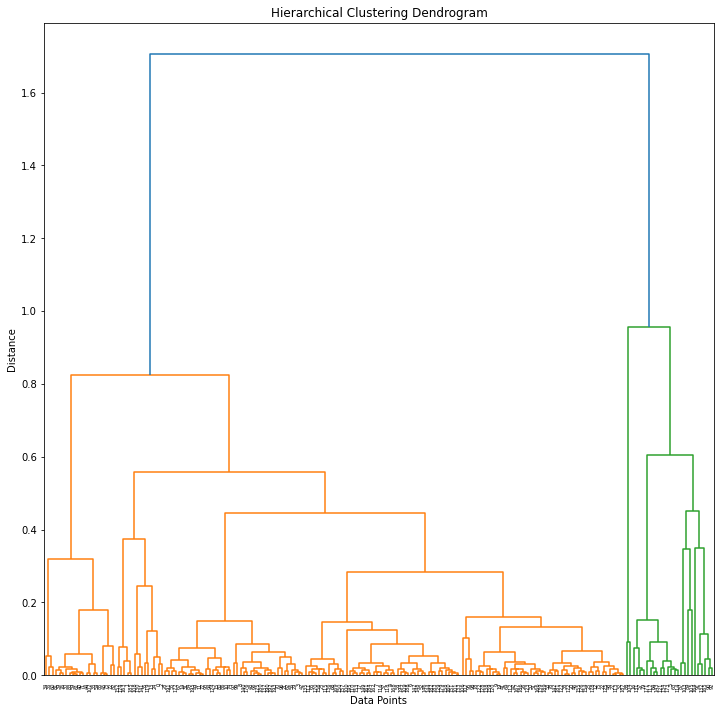

In [35]:
# Generate synthetic data (you can replace this with your own dataset)
scaler6 = MinMaxScaler()
X_scaled6 = scaler6.fit_transform(x6) 
# Perform hierarchical clustering using complete linkage
linkage_matrix6 = linkage(X_scaled6, method='complete')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 12))
dendrogram(linkage_matrix6)#, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [36]:
cut_height = 0.01

# Assign data points to clusters based on the cut height
clusters6 = fcluster(linkage_matrix6, cut_height, criterion='distance')

# Collect data points in each cluster
cluster_dict6 = {}
for data_point6, cluster_id6 in enumerate(clusters6):
    if cluster_id6 not in cluster_dict6:
        cluster_dict6[cluster_id6] = []
    cluster_dict6[cluster_id6].append(data_point6)

# Print the clusters at different levels
for cluster_id6, data_points6 in cluster_dict6.items():
    print(f'Cluster {cluster_id6}: {data_points6}')


Cluster 24: [0]
Cluster 15: [1, 185]
Cluster 25: [2]
Cluster 52: [3, 29, 42]
Cluster 69: [4, 168]
Cluster 126: [5]
Cluster 72: [6, 147]
Cluster 66: [7, 116]
Cluster 43: [8]
Cluster 87: [9, 19, 120]
Cluster 37: [10]
Cluster 32: [11, 49, 77]
Cluster 108: [12]
Cluster 22: [13]
Cluster 30: [14, 31, 67]
Cluster 35: [15, 80]
Cluster 118: [16]
Cluster 64: [17, 149]
Cluster 86: [18]
Cluster 103: [20, 46]
Cluster 50: [21]
Cluster 110: [22, 125]
Cluster 55: [23, 115]
Cluster 23: [24]
Cluster 106: [25]
Cluster 93: [26, 123, 186]
Cluster 111: [27, 32, 113, 187]
Cluster 26: [28]
Cluster 7: [30]
Cluster 9: [33, 54]
Cluster 3: [34]
Cluster 20: [35]
Cluster 1: [36]
Cluster 68: [37, 118]
Cluster 101: [38, 172]
Cluster 4: [39, 76]
Cluster 6: [40, 59, 61, 71, 83]
Cluster 90: [41]
Cluster 45: [43]
Cluster 8: [44, 102]
Cluster 10: [45, 73, 85]
Cluster 92: [47, 167]
Cluster 112: [48]
Cluster 97: [50]
Cluster 95: [51, 166]
Cluster 73: [52, 146]
Cluster 98: [53, 78]
Cluster 28: [55]
Cluster 53: [56]
Cluster 1

In [37]:
count=1
for subdir, dirs, files in os.walk('aug7'):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            name=file
            image = cv2.resize(img, (224, 224))
            patch_shape = (16, 16, 3)
            patches = patchify(image, patch_shape, 16)
            a = (224**2) // (16**2)
            patches = np.reshape(patches, (196, 16, 16, 3))
            b = (a, 16*16*3)
            
            for i in range(196):
                cv2.imwrite(f"files7/{count}_{i}.png", patches[i])
            count=count+1


In [38]:
#Set root directory for os.walk
rootdir="files7"
#Conter variable to count number of image processed
count=0


#write headers in csv files
with open('details7','w',newline='') as f1:
    fieldnames=["image_name", "r", "g", "b"]
    writer=csv.DictWriter(f1, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
start=time.time()
#Iterate through the images directory
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):

            # Input image path
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img1 =img[:,:,0]
            img2 =img[:,:,1]
            img3 =img[:,:,2]
            fl=img1.flatten()
            fl1=img2.flatten()
            fl2=img3.flatten()
            fl=sum(fl)
            fl1=sum(fl1)
            fl2=sum(fl2)
            line= [file,fl,fl1,fl2]
            with open("details7.csv","a",newline="") as s:
                    writer=csv.writer(s, delimiter=",")
                    writer.writerow(line)
            count+=1
            print(count)
end=time.time()

print("Total image processed={}    Time={}".format(count,end-start))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
Total image processed=196    Time=0.26251792907714844


In [39]:
img7=pd.read_csv('C:\\Users\\Admin\\Desktop\\details7.csv',header=None)
x7=img7.drop([0],1)
print(x7)
print(np.shape(x7))

         1      2      3
0    11408  21615   9144
1    15349  25152  12886
2    11175  21602  10553
3    16678  32062   9543
4    17062  32433   9679
..     ...    ...    ...
191   7508  24306   4278
192   5593  22684   3228
193   8074  24697   4584
194  27517  39553  15661
195  16602  31431   9379

[196 rows x 3 columns]
(196, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10808\1218504928.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x7=img7.drop([0],1)


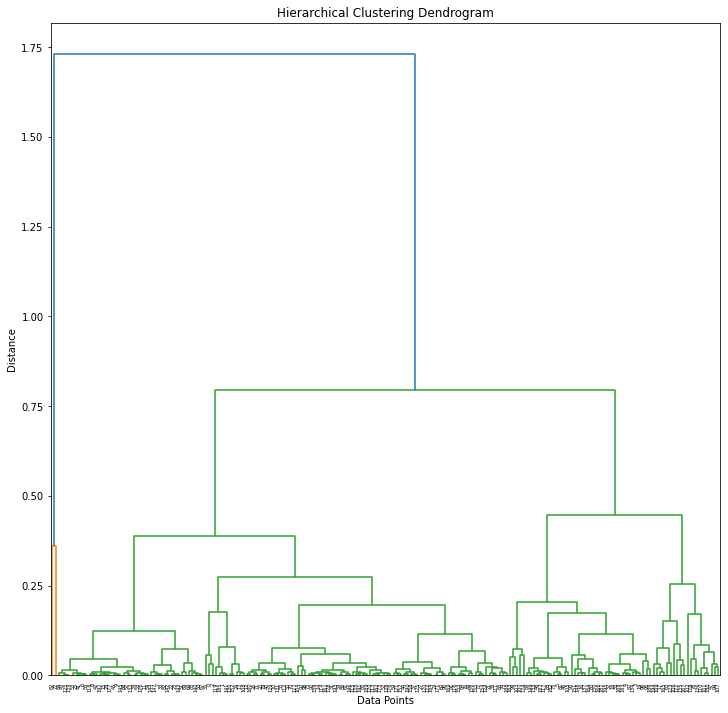

In [40]:
# Generate synthetic data (you can replace this with your own dataset)
scaler7 = MinMaxScaler()
X_scaled7 = scaler7.fit_transform(x7) 
# Perform hierarchical clustering using complete linkage
linkage_matrix7 = linkage(X_scaled7, method='complete')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 12))
dendrogram(linkage_matrix7)#, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [41]:
cut_height = 0.01

# Assign data points to clusters based on the cut height
clusters7 = fcluster(linkage_matrix7, cut_height, criterion='distance')

# Collect data points in each cluster
cluster_dict7 = {}
for data_point7, cluster_id7 in enumerate(clusters7):
    if cluster_id7 not in cluster_dict7:
        cluster_dict7[cluster_id7] = []
    cluster_dict7[cluster_id7].append(data_point7)

# Print the clusters at different levels
for cluster_id7, data_points7 in cluster_dict7.items():
    print(f'Cluster {cluster_id7}: {data_points7}')


Cluster 15: [0]
Cluster 18: [1, 141, 185]
Cluster 16: [2]
Cluster 63: [3, 19, 134]
Cluster 62: [4, 87, 183]
Cluster 53: [5, 75, 81]
Cluster 4: [6, 25, 41, 53, 56]
Cluster 8: [7, 36, 144, 147]
Cluster 5: [8, 9, 15, 28, 42, 45, 118, 145, 177, 192]
Cluster 24: [10, 55, 112, 131]
Cluster 7: [11, 34, 54, 58, 126]
Cluster 22: [12, 26, 71, 160]
Cluster 21: [13, 24, 108]
Cluster 29: [14, 31, 73, 92, 114, 159, 161, 178, 193]
Cluster 55: [16, 137, 148]
Cluster 67: [17, 165]
Cluster 61: [18, 32, 33, 168, 195]
Cluster 23: [20, 40, 79, 129]
Cluster 42: [21, 38, 111]
Cluster 10: [22, 23, 143]
Cluster 36: [27, 170, 172, 184]
Cluster 37: [29, 60, 90, 171]
Cluster 25: [30, 70, 127]
Cluster 17: [35]
Cluster 35: [37, 44, 158, 175, 190]
Cluster 30: [39, 61, 86, 146]
Cluster 3: [43, 84, 125, 139]
Cluster 54: [46, 105]
Cluster 83: [47]
Cluster 51: [48, 88, 117, 182, 187]
Cluster 40: [49, 156]
Cluster 13: [50, 67, 83, 140]
Cluster 11: [51]
Cluster 6: [52, 68, 132]
Cluster 32: [57, 113, 128, 162, 173, 176]
Cl

In [42]:
count=1
for subdir, dirs, files in os.walk('aug8'):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            name=file
            image = cv2.resize(img, (224, 224))
            patch_shape = (16, 16, 3)
            patches = patchify(image, patch_shape, 16)
            a = (224**2) // (16**2)
            patches = np.reshape(patches, (196, 16, 16, 3))
            b = (a, 16*16*3)
            
            for i in range(196):
                cv2.imwrite(f"files8/{count}_{i}.png", patches[i])
            count=count+1


In [43]:
#Set root directory for os.walk
rootdir="files8"
#Conter variable to count number of image processed
count=0


#write headers in csv files
with open('details8','w',newline='') as f1:
    fieldnames=["image_name", "r", "g", "b"]
    writer=csv.DictWriter(f1, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
start=time.time()
#Iterate through the images directory
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):

            # Input image path
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img1 =img[:,:,0]
            img2 =img[:,:,1]
            img3 =img[:,:,2]
            fl=img1.flatten()
            fl1=img2.flatten()
            fl2=img3.flatten()
            fl=sum(fl)
            fl1=sum(fl1)
            fl2=sum(fl2)
            line= [file,fl,fl1,fl2]
            with open("details8.csv","a",newline="") as s:
                    writer=csv.writer(s, delimiter=",")
                    writer.writerow(line)
            count+=1
            print(count)
end=time.time()

print("Total image processed={}    Time={}".format(count,end-start))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
Total image processed=196    Time=0.28644871711730957


In [44]:
img8=pd.read_csv('C:\\Users\\Admin\\Desktop\\details8.csv',header=None)
x8=img8.drop([0],1)
print(x8)
print(np.shape(x8))

         1      2      3
0    10445  20840   8577
1    10853  21097   8786
2    28206  33296  22598
3     9012  25509   5208
4    18230  33148  10296
..     ...    ...    ...
191  16226  31396   9265
192  21478  35898  12120
193  12603  28434   7434
194  16375  31377   9333
195  16204  31237   9407

[196 rows x 3 columns]
(196, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10808\807433580.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x8=img8.drop([0],1)


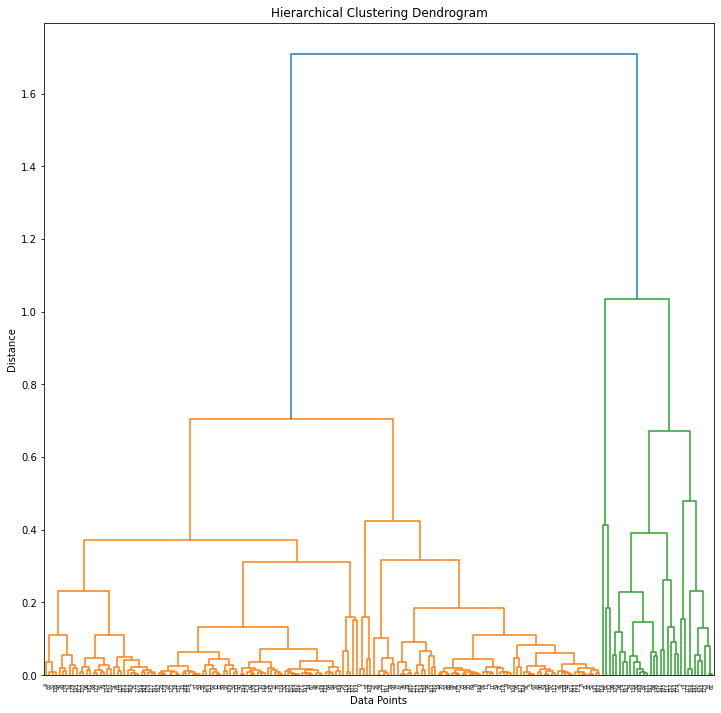

In [45]:
# Generate synthetic data (you can replace this with your own dataset)
scaler8 = MinMaxScaler()
X_scaled8 = scaler8.fit_transform(x8) 
# Perform hierarchical clustering using complete linkage
linkage_matrix8 = linkage(X_scaled8, method='complete')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 12))
dendrogram(linkage_matrix8)#, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [46]:
cut_height = 0.01

# Assign data points to clusters based on the cut height
clusters8 = fcluster(linkage_matrix8, cut_height, criterion='distance')

# Collect data points in each cluster
cluster_dict8 = {}
for data_point8, cluster_id8 in enumerate(clusters8):
    if cluster_id8 not in cluster_dict8:
        cluster_dict8[cluster_id8] = []
    cluster_dict8[cluster_id8].append(data_point8)

# Print the clusters at different levels
for cluster_id8, data_points8 in cluster_dict8.items():
    print(f'Cluster {cluster_id8}: {data_points8}')


Cluster 54: [0]
Cluster 55: [1]
Cluster 112: [2]
Cluster 75: [3, 11, 17, 86]
Cluster 2: [4]
Cluster 82: [5, 63, 91, 104]
Cluster 74: [6, 20, 69, 73, 92, 149]
Cluster 28: [7, 30, 58, 159]
Cluster 88: [8, 71, 173, 183]
Cluster 76: [9, 39, 118]
Cluster 39: [10, 113, 144]
Cluster 31: [12, 62, 72]
Cluster 113: [13]
Cluster 45: [14, 67, 171, 193]
Cluster 27: [15, 188]
Cluster 8: [16]
Cluster 26: [18, 47, 122, 151]
Cluster 72: [19, 53, 70, 85]
Cluster 77: [21]
Cluster 40: [22, 76, 129]
Cluster 25: [23, 178, 187]
Cluster 51: [24]
Cluster 46: [25, 48, 148]
Cluster 58: [26, 28]
Cluster 62: [27]
Cluster 64: [29, 160]
Cluster 42: [31]
Cluster 1: [32, 83, 156]
Cluster 119: [33, 61]
Cluster 102: [34]
Cluster 56: [35]
Cluster 48: [36]
Cluster 89: [37, 52]
Cluster 86: [38, 44, 101, 158]
Cluster 37: [40, 184]
Cluster 73: [41, 88, 175]
Cluster 63: [42, 78]
Cluster 83: [43, 90]
Cluster 13: [45]
Cluster 5: [46]
Cluster 3: [49]
Cluster 44: [50]
Cluster 19: [51]
Cluster 84: [54, 180]
Cluster 29: [55]
Cluste

In [47]:
count=1
for subdir, dirs, files in os.walk('aug9'):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            name=file
            image = cv2.resize(img, (224, 224))
            patch_shape = (16, 16, 3)
            patches = patchify(image, patch_shape, 16)
            a = (224**2) // (16**2)
            patches = np.reshape(patches, (196, 16, 16, 3))
            b = (a, 16*16*3)
            
            for i in range(196):
                cv2.imwrite(f"files9/{count}_{i}.png", patches[i])
            count=count+1


In [48]:
#Set root directory for os.walk
rootdir="files9"
#Conter variable to count number of image processed
count=0


#write headers in csv files
with open('details9','w',newline='') as f1:
    fieldnames=["image_name", "r", "g", "b"]
    writer=csv.DictWriter(f1, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
start=time.time()
#Iterate through the images directory
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #if file is an image
        if file.endswith(('.jpg','.jpeg','.JPG','png','PNG')):

            # Input image path
            img_path=os.path.join(subdir, file)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img1 =img[:,:,0]
            img2 =img[:,:,1]
            img3 =img[:,:,2]
            fl=img1.flatten()
            fl1=img2.flatten()
            fl2=img3.flatten()
            fl=sum(fl)
            fl1=sum(fl1)
            fl2=sum(fl2)
            line= [file,fl,fl1,fl2]
            with open("details9.csv","a",newline="") as s:
                    writer=csv.writer(s, delimiter=",")
                    writer.writerow(line)
            count+=1
            print(count)
end=time.time()

print("Total image processed={}    Time={}".format(count,end-start))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
Total image processed=196    Time=0.2725849151611328


In [49]:
img9=pd.read_csv('C:\\Users\\Admin\\Desktop\\details9.csv',header=None)
x9=img9.drop([0],1)
print(x9)
print(np.shape(x9))

         1      2      3
0    13388  23211  10425
1    10683  20881   8984
2    13610  23106  11116
3    16711  30891  10593
4    27748  39169  19347
..     ...    ...    ...
191  24413  36726  15450
192  17902  32258  10573
193  19158  32771  12639
194  22496  35472  15660
195  22455  35508  15206

[196 rows x 3 columns]
(196, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10808\4095408368.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x9=img9.drop([0],1)


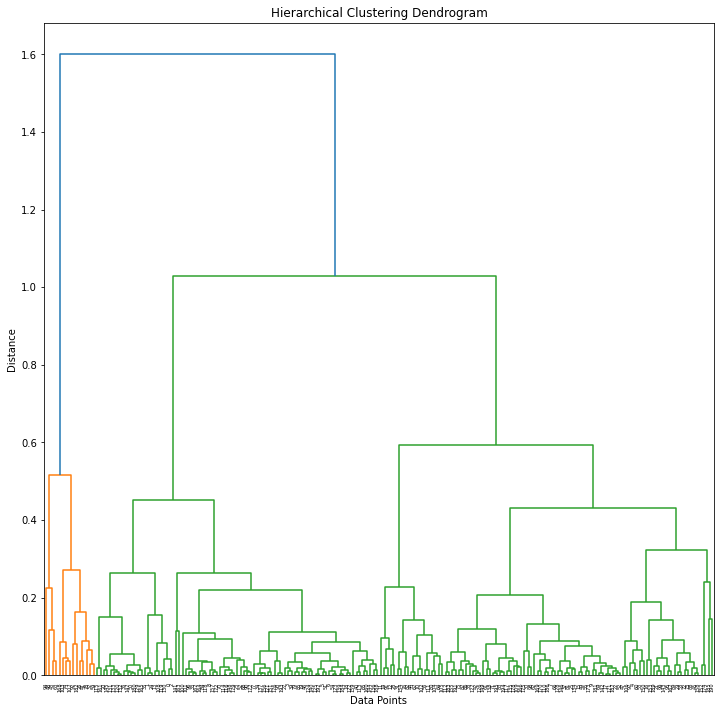

In [50]:
# Generate synthetic data (you can replace this with your own dataset)
scaler9 = MinMaxScaler()
X_scaled9 = scaler9.fit_transform(x9) 
# Perform hierarchical clustering using complete linkage
linkage_matrix9 = linkage(X_scaled9, method='complete')

# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 12))
dendrogram(linkage_matrix9)#, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [51]:
cut_height = 0.01

# Assign data points to clusters based on the cut height
clusters9 = fcluster(linkage_matrix9, cut_height, criterion='distance')

# Collect data points in each cluster
cluster_dict9 = {}
for data_point9, cluster_id9 in enumerate(clusters9):
    if cluster_id9 not in cluster_dict9:
        cluster_dict9[cluster_id9] = []
    cluster_dict9[cluster_id9].append(data_point9)

# Print the clusters at different levels
for cluster_id9, data_points9 in cluster_dict9.items():
    print(f'Cluster {cluster_id9}: {data_points9}')


Cluster 31: [0]
Cluster 26: [1, 24]
Cluster 32: [2]
Cluster 54: [3]
Cluster 136: [4]
Cluster 62: [5, 51]
Cluster 64: [6]
Cluster 117: [7]
Cluster 40: [8]
Cluster 128: [9]
Cluster 84: [10]
Cluster 78: [11]
Cluster 76: [12]
Cluster 28: [13]
Cluster 74: [14]
Cluster 125: [15, 49]
Cluster 141: [16]
Cluster 131: [17, 171]
Cluster 66: [18, 122]
Cluster 58: [19, 46]
Cluster 18: [20]
Cluster 143: [21]
Cluster 132: [22, 52]
Cluster 47: [23]
Cluster 123: [25]
Cluster 11: [26]
Cluster 56: [27]
Cluster 77: [28]
Cluster 149: [29, 58]
Cluster 111: [30]
Cluster 79: [31]
Cluster 13: [32]
Cluster 35: [33, 96, 162]
Cluster 49: [34, 137, 156]
Cluster 27: [35]
Cluster 23: [36]
Cluster 122: [37, 81]
Cluster 99: [38]
Cluster 55: [39]
Cluster 67: [40, 113]
Cluster 12: [41]
Cluster 97: [42, 126]
Cluster 1: [43]
Cluster 83: [44, 67]
Cluster 153: [45, 158]
Cluster 134: [47]
Cluster 3: [48]
Cluster 22: [50, 147, 180]
Cluster 139: [53]
Cluster 63: [54, 123]
Cluster 126: [55]
Cluster 86: [56]
Cluster 46: [57]
Clus

In [22]:
print(len(cluster_dict))
print(len(cluster_dict1))
print(len(cluster_dict2))
print(len(cluster_dict3))
print(len(cluster_dict4))
print(len(cluster_dict5))
print(len(cluster_dict6))
print(len(cluster_dict7))
print(len(cluster_dict8))
print(len(cluster_dict9))

108


In [53]:
print(np.shape(x))
print(np.shape(x1))
print(np.shape(x2))
print(np.shape(x3))
print(np.shape(x4))
print(np.shape(x5))
print(np.shape(x6))
print(np.shape(x7))
print(np.shape(x8))
print(np.shape(x9))

(196, 3)
(196, 3)
(196, 3)
(196, 3)
(196, 3)
(196, 3)
(196, 3)
(196, 3)
(196, 3)
(196, 3)


In [2]:
data = pd.read_excel(('C:\\Users\\Admin\\Desktop\\Patch_selectiion.xlsx'))

In [3]:
data.head()

,No,Patches
0,1,116
1,2,133
2,3,149
3,4,130
4,5,149


In [4]:
mean=np.mean(data["Patches"])
mean

129.56748466257667

In [5]:
median=np.median(data["Patches"])
median

130.5

In [8]:
mode=np.bincount(data["Patches"])
mode

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  2,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,
        0,  1,  1,  4,  1,  1,  1,  1,  1,  2,  1,  1,  4,  1,  1,  1,  4,
        0,  0,  0,  6,  1,  1,  2,  3,  4,  6,  3,  3,  6,  2,  3,  5,  1,
        2,  3,  2,  3,  5,  4, 11, 10,  8, 10,  7,  4, 16,  5, 12, 12,  5,
        6, 12, 11,  6, 12, 14, 13,  5, 16, 10, 12, 12, 14,  8, 10, 18,  9,
       12, 10,  5,  7,  7, 11, 20,  9, 10,  9,  6, 10,  4,  9, 11, 10,  3,
        6,  3, 10, 10,  4,  5,  5, 11,  6,  5,  6,  4,  4,  3,  2,  2,  5,
        3,  1,  3,  3,  1,  5,  0,  1,  1,  2,  0,  0,  2,  0,  0,  1],
      dtype=int64)

In [10]:
from collections import Counter
 
# list of elements to calculate mode

n = len(data["Patches"])
 
data = Counter(data["Patches"])
get_mode = dict(data)
mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]
 
if len(mode) == n:
    get_mode = "No mode found"
else:
    get_mode = "Mode is / are: " + ', '.join(map(str, mode))
     
print(get_mode)

Mode is / are: 142
